<a href="https://colab.research.google.com/github/yeric1789/CMSC320_Final_Project/blob/main/NoteBookFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
sns.set_style("darkgrid")

#Loading the data 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
data = pd.read_csv('/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/Data_Entry_2017.csv')
data = data.iloc[:4999] # We use a subset 
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


#Data exploration 
Each observation has an image and some more attributes attached to it, we will start by exploring some of the attributes first. 

In [136]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,0.0
mean,7.153431,664.016003,51.809362,2585.575115,2465.156431,0.157476,0.157476,NaN
std,11.211108,395.466319,17.015137,332.878470,392.205703,0.015117,0.015117,NaN
min,0.000000,1.000000,9.000000,1694.000000,1677.000000,0.115000,0.115000,NaN
25%,0.000000,318.000000,40.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,643.000000,54.000000,2500.000000,2500.000000,0.168000,0.168000,NaN
75%,8.000000,1021.500000,64.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,66.000000,1335.000000,94.000000,3056.000000,3056.000000,0.198800,0.198800,NaN


In [137]:
def count_disease(findings):
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [138]:
data['Finding Labels'] = data.apply(lambda x: x['Finding Labels'].split('|'),axis = 1)

# Count the different 
overview = {}
for findings in data['Finding Labels']:
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [139]:
overview

{'Cardiomegaly': 196,
 'Emphysema': 125,
 'Effusion': 487,
 'No Finding': 2754,
 'Hernia': 27,
 'Infiltration': 830,
 'Mass': 161,
 'Nodule': 214,
 'Atelectasis': 460,
 'Pneumothorax': 199,
 'Pleural_Thickening': 165,
 'Pneumonia': 65,
 'Fibrosis': 172,
 'Edema': 90,
 'Consolidation': 205}

Now we can create a one-hot encoding dataframe of all the labels being assigned to each image. After that it can be concatenated with the originial data matrix. 

In [140]:
dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())
for i,des in enumerate(data['Finding Labels']):
  dummies.loc[i][des] = 1

#Concat horizontally
data = pd.concat([data,dummies],axis=1)

<ipython-input-140-9b6e35be31a7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())


Now let's see which diseases are the most common, by plotting a histogram. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

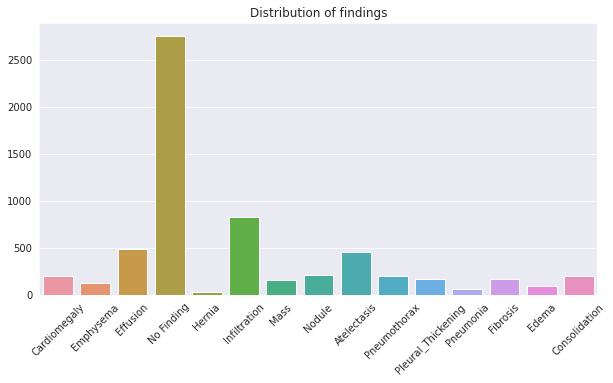

In [141]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(overview.keys())
y = list(overview.values())
sns.barplot(x,y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)

Another thing our data accounts for is gender, so we can also vizualize if a Gender would have influence on how frequent a lung disese occurs. 

In [142]:
gender_df = data.groupby('Patient Gender').count()
gender_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
Patient Gender,,,,,,,,,,,,,,,,,,,,,
F,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,...,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391
M,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608


Now we can plot the correlation matrix, to check if any of the findings often occur togehter. Note that we have dropped *'No Finding'* since it will never occur together with any of the other variables. 

Text(0.5, 1.0, 'Correlation matrix of findings')

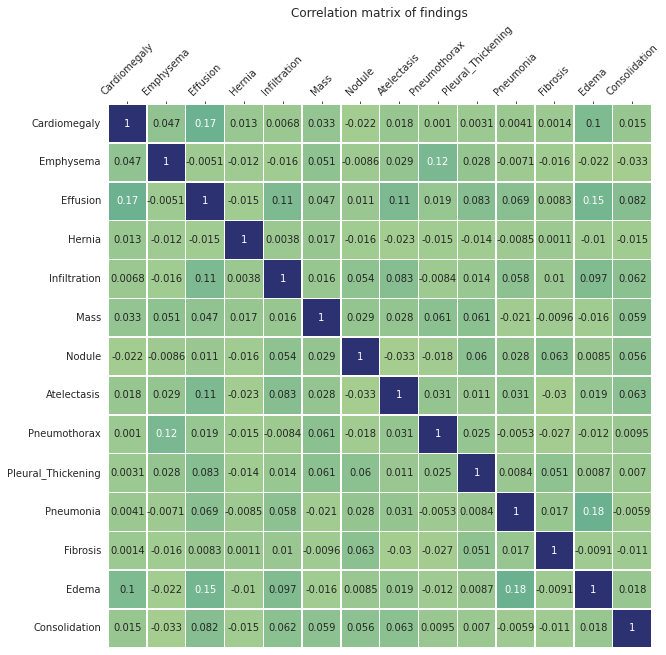

In [143]:
plt.rcParams["figure.figsize"] = (15,10)
df = dummies.drop(columns = 'No Finding').corr()
ax = sns.heatmap(df,annot = True,cmap="crest",square=True, linewidths=.5,cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.title('Correlation matrix of findings')

# Predicting the label from images. 

In [159]:
import torch 
from torchvision import datasets, transforms
from torchvision.models import inception_v3
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob
import os
from skimage import io, transform

In order to work with pytorch and the image data, we have to create a costoum data-set. 

In [183]:
class LungDataSet(Dataset):
  
  def __init__(self,df,root_dir,input_size,transform = None):
    self.df = df 
    self.root_dir = root_dir
    self.transform = transform
    self.input_size = input_size

  def __len__(self):
    return len(self.df)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
            idx = idx.tolist()
    
    img_name = self.df.iloc[idx,0]
    path = os.path.join(self.root_dir,img_name)
    print(path)

    image = io.imread(path)
    image = torch.tensor(transform.resize(image, self.input_size))
    labels = self.df.iloc[idx,12:]
    
    labels = torch.tensor(labels.to_list()).to(float)

    sample = {'image': image, 'labels': labels}

    if self.transform:
      sample = self.transform(sample)

    return sample 

In [186]:
dir = '/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/'
data_set = LungDataSet(df = data,root_dir = dir,input_size = (299,299))

In [187]:
data_set[4998]['image'].size()

/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001335_006.png


torch.Size([299, 299])

/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000001_000.png
0 torch.Size([299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000001_001.png
1 torch.Size([299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000001_002.png
2 torch.Size([299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000002_000.png
3 torch.Size([299, 299]) torch.Size([15])


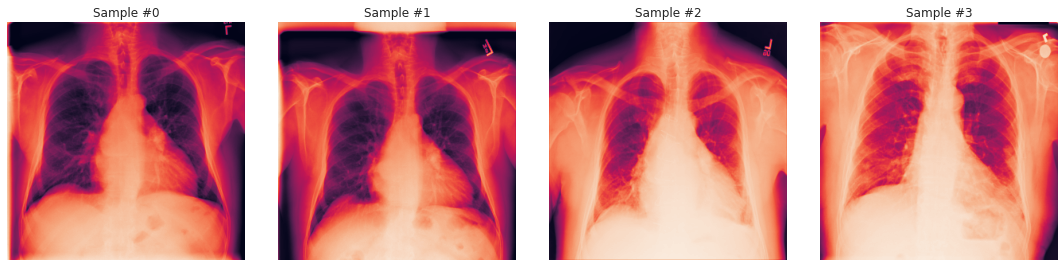

In [188]:
fig = plt.figure()

for i in range(len(data_set)):
    sample = data_set[i]

    print(i, sample['image'].shape, sample['labels'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 3:
        plt.show()
        break

In [189]:
dataloader = DataLoader(data_set, batch_size=4,
                        shuffle=True, num_workers=0)

In [190]:
model = inception_v3(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
